In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import os
sys.path.insert(0,'/content/drive/My Drive/ColabNotebooks')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

In [3]:
from preprocess_train import *

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Shape of input data: (425, 11)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



 Longest line at idx: 174

 Length of longest line: 622

 Longest line:: level gallery hold activity bolter equipment no operator perform drill first hole support right gable drill end drill rod break leave thread inside drill machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enter corrugate iron central hole rest bar embed shank generate pressure moment operator activate percussion generate movement shank hit palm victim leave hand generate describe injury worker wear safety gloves time accident end corrugate iron contact leave hand shape like cane worker time accident position roof support mesh split set
Vocabulary size: 2372

: Saving model file: embedding_word2vec.txt

 Found 2372 unique tokens.

 Shape of Desc tensor: (425, 100)

 Shape of label tensor: (425, 5)
######################################## 
Number of rows in training dataset: 382
Number of columns in training dataset: 100
Number of uniq

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 Before Sampling: X_train: (425, 100), y_train: (425, 5)

 After Sampling: X: (1580, 100), y: (1580, 5)

 After oversampling: X_train: (1264, 100), y_train: (1264, 5)

 After oversampling: X_test : (316, 100), y_test : (316, 5)

 Embedding Matrix shape: (2373, 100)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          237300    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 96, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 5)               

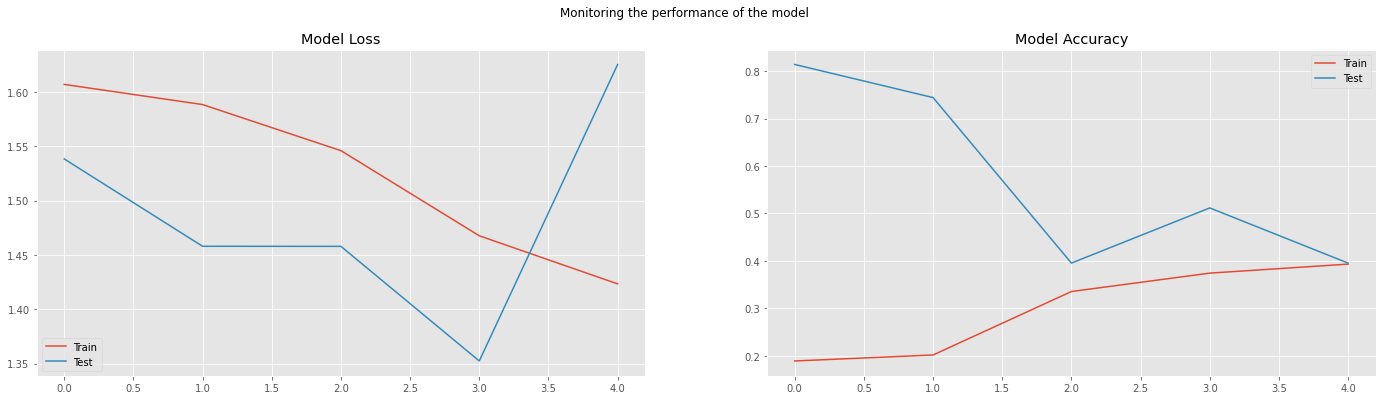



 Testing the model...


5/5 [==============================] - 0s 26ms/step - loss: 1.6253 - accuracy: 0.3953

Test score: 1.6253352165222168

Test accuracy: 0.39534884691238403

Accuracy: 39.53%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


3/3 [==============================] - 1s 95ms/step
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        55
           1       0.42      0.18      0.25        62
           2       0.38      0.33      0.35        69
           3       0.09      0.01      0.03        67
           4       0.35      0.95      0.51        63

    accuracy                           0.37       316
   macro avg       0.34      0.37      0.31       316
weighted avg       0.33      0.37      0.31       316



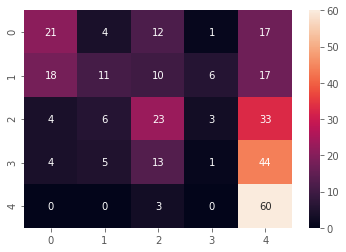

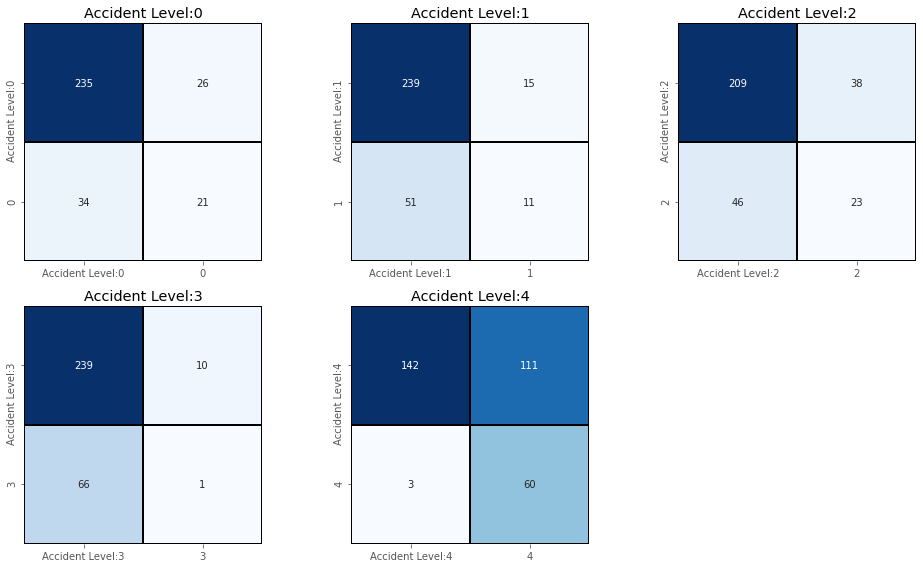


 Saving w2v mode::
INFO:tensorflow:Assets written to: w2v_model_dir/assets


In [4]:
data = pd.read_csv('data.csv')
df = preprocess_data(data)
w2v_embedding_file = 'embedding_word2vec.txt'
w2v_model_dir = 'w2v_model_dir'
desc_lines = create_save_w2v_embedding(w2v_embedding_file, df)
train_save_w2_model(df, w2v_embedding_file, desc_lines, w2v_model_dir)

In [5]:
input_str = 'Hi There ...'
input_str0 = 'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'
input_str4 = 'Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.'
input_str0a = 'While preparing the rice for the lunch of the day, when moving the pot # 60 - 35 Kg of weight including the contents - to evacuate the residual water of the cooking of the rice, when positioning the pot on a jaba it tilts backwards spilling some 200 ml of hot water on the cooks leg. The cook immediately after the event applies first aid, pouring cold water on the area of ​​the injury and go to the medical post for evaluation.'



In [6]:
predict(input_str4, w2v_model_dir, w2v_embedding_file)


 Found 25 unique tokens.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 0s 12ms/step

Prediction class: 4


4

In [7]:
predict(input_str0, w2v_model_dir, w2v_embedding_file)


 Found 22 unique tokens.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


9/9 [==============================] - 0s 12ms/step

Prediction class: 0


0

In [8]:
predict(input_str0a, w2v_model_dir, w2v_embedding_file)


 Found 23 unique tokens.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


8/8 [==============================] - 0s 13ms/step

Prediction class: 0


0